## Setting up

In [1]:
# Getting started: Installing YOLO and requirements.
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -q torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1
%pip install -qr requirements.txt

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-369-g907bef2f Python-3.10.14 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 14931MiB)


Setup complete ✅ (4 CPUs, 15.3 GB RAM, 86.4/135.0 GB disk)


In [2]:
# Check if a GPU is available for training. Using a GPU significantly accelerates execution time.
use_cuda = torch.cuda.is_available()
if use_cuda:
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)

__CUDNN VERSION: 8903
__Number CUDA Devices: 1
__CUDA Device Name: Tesla T4
__CUDA Device Total Memory [GB]: 15.655829504


In [4]:
# Getting pre-built YOLOv5 weights.
!wget -q https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s.pt

## Loading data

In [5]:
# The Roboflow API is public, but requires an API key for access.
# To create an API key, visit: https://docs.roboflow.com/api-reference/authentication
# Replace 'your_api_key_here' with your actual Roboflow API key
api_key = "your_api_key_here"

In [ ]:
# Downloading iNaturalist dataset
%pip install -q roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("apisinaturalist2").project("apis_inaturalist_2")
dataset = project.version(1).download("yolov5")

## Training

In [ ]:
data = "Apis_Inaturalist_2-1/data.yaml"
weights = "yolov5s.pt"
!python train.py --img 640 --batch 16 --epochs 20 --data {data} --weights {weights} --cache

In [ ]:
!python export.py --weights "runs/train/exp/weights/best.pt" --include pb

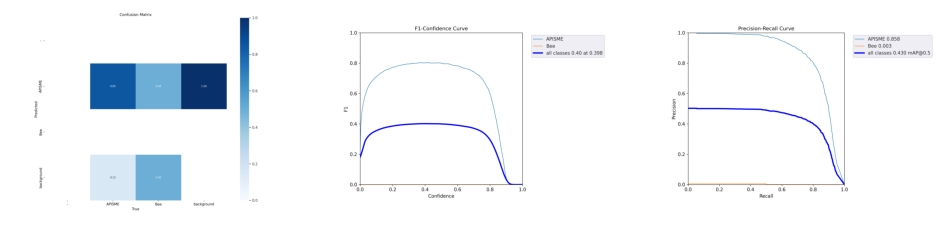

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
for i, metric in enumerate(["confusion_matrix.png", "F1_curve.png", "PR_curve.png"]):
    axs[i].imshow(mpimg.imread(f"runs/train/exp/{metric}"))
    axs[i].axis('off')
plt.show()

## Validating

In [ ]:
data = "Apis_Inaturalist_2-1/data.yaml"
weights = "runs/train/exp/weights/best.pt"
!python val.py --batch 16 --data {data} --weights {weights}

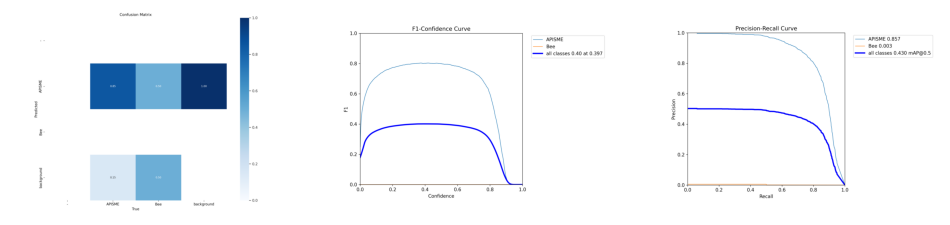

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
for i, metric in enumerate(["confusion_matrix.png", "F1_curve.png", "PR_curve.png"]):
    axs[i].imshow(mpimg.imread(f"runs/val/exp/{metric}"))
    axs[i].axis('off')
plt.show()

## Detecting

In [12]:
image_example = "apis_inaturalist1855991232022-04-01_jpeg.rf.ed1a87e5ab4459ab530697084dcc640e.jpg"

In [ ]:
weights = "runs/train/exp/weights/best.pt"
source = f"Apis_Inaturalist_2-1/test/images/{image_example}"
!python3 detect.py --weights {weights} --conf 0.25 --source {source}

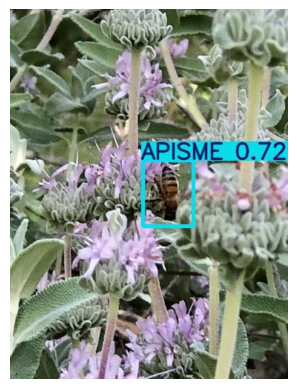

In [14]:
img = mpimg.imread(f"runs/detect/exp/{image_example}")
plt.imshow(img)
plt.axis('off')
plt.show()